Epoch 0: Loss = 0.30456000566482544, Accuracy = 0.6100000143051147
Epoch 50: Loss = 0.3028111457824707, Accuracy = 0.6100000143051147
Epoch 100: Loss = 0.3010580539703369, Accuracy = 0.6100000143051147
Epoch 150: Loss = 0.2993021309375763, Accuracy = 0.6100000143051147
Epoch 200: Loss = 0.2975447475910187, Accuracy = 0.6299999952316284
Epoch 250: Loss = 0.295787513256073, Accuracy = 0.6299999952316284
Epoch 300: Loss = 0.2940320670604706, Accuracy = 0.6299999952316284
Epoch 350: Loss = 0.29228025674819946, Accuracy = 0.6299999952316284
Epoch 400: Loss = 0.29053398966789246, Accuracy = 0.6299999952316284
Epoch 450: Loss = 0.28879550099372864, Accuracy = 0.6200000047683716


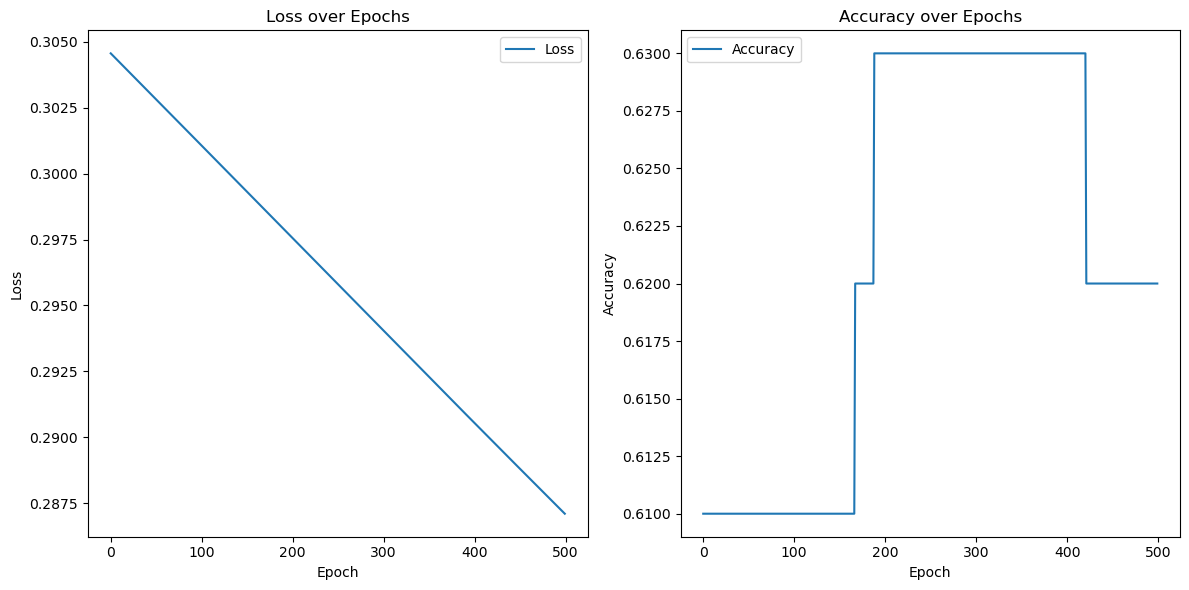

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu và ép kiểu về float32
np.random.seed(42)
X_train = np.random.randn(100, 3).astype(np.float32)  # 100 điểm dữ liệu, 3 đầu vào (ép kiểu float32)
y_train = np.random.randint(0, 2, (100, 1)).astype(np.float32)  # Nhãn 0 hoặc 1 cho 100 điểm dữ liệu (ép kiểu float32)

# Khởi tạo trọng số và bias ngẫu nhiên
w = tf.Variable(tf.random.normal([3, 1], dtype=tf.float32))
b = tf.Variable(tf.random.normal([1], dtype=tf.float32))

# Số lần huấn luyện và learning rate
epochs = 500
learning_rate = 0.01

# Hàm kích hoạt
def activation_function(x, activation='sigmoid'):
    if activation == 'tanh':
        return tf.nn.tanh(x)
    elif activation == 'sigmoid':
        return tf.nn.sigmoid(x)
    elif activation == 'relu':
        return tf.nn.relu(x)
    else:
        raise ValueError("Unsupported activation function")

# Hàm tính toán đầu ra
def model(X):
    return activation_function(tf.matmul(X, w) + b, activation='sigmoid')

# Hàm mất mát (Mean Squared Error)
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Sử dụng Gradient Descent để tối ưu hóa trọng số và bias
optimizer = tf.optimizers.SGD(learning_rate)

# Huấn luyện mạng neuron
losses = []
accuracies = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X_train)
        loss = loss_fn(y_train, y_pred)

    # Tính gradient và cập nhật trọng số, bias
    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    # Tính độ chính xác
    predictions = tf.cast(y_pred > 0.5, tf.float32)  # Nếu giá trị dự đoán > 0.5 thì là lớp 1, ngược lại lớp 0
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_train), tf.float32))
    
    losses.append(loss.numpy())
    accuracies.append(accuracy.numpy())

    if epoch % 50 == 0:  # Hiển thị kết quả mỗi 50 epoch
        print(f"Epoch {epoch}: Loss = {loss.numpy()}, Accuracy = {accuracy.numpy()}")

# Vẽ biểu đồ độ mất mát và độ chính xác
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label="Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
